In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds

In [83]:
X, y = ds.make_regression(n_samples=1000,n_features=5,noise=10,random_state=23)

In [84]:
X.T.shape

(5, 1000)

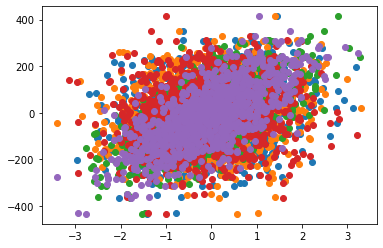

In [85]:
plt.scatter(X.T[0],y)
plt.scatter(X.T[1],y)
plt.scatter(X.T[2],y)
plt.scatter(X.T[3],y)
plt.scatter(X.T[4],y)

1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [87]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [88]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    E = []
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        E.append(err**0.5)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W, E

In [114]:
def eval_sgd_model(X, y, iterations, qty_in_batch=1, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    E = []
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

            # print(b, n_batch, start_, end_)

            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        y_pred = np.dot(W, X)
        E.append(calc_mse(y, y_pred)**0.5)
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W, E

In [119]:
W1, E1 = eval_model(X.T, y, iterations=1000, alpha=1e-3)
print()
W2, E2 = eval_sgd_model(X.T, y, iterations=1000, qty_in_batch=5, alpha=1e-3)

100 [ 4.09278709  4.63252773 15.59375508  0.261053   16.18241732] 11899.081051841456
200 [ 6.97011634  7.92054637 28.09447027  2.24113114 29.58391665] 8290.408305145322
300 [ 9.30397305 10.62075803 38.57398692  3.85626987 40.71243787] 5786.513780985055
400 [11.19765991 12.83869001 47.3577058   5.17390256 49.95452401] 4048.8418476541497
500 [12.73473842 14.66084556 54.71891602  6.24897066 57.63078792] 2842.701134804537
600 [13.98281831 16.15814751 60.88708592  7.1262436  64.00719418] 2005.3606871208278
700 [14.99661694 17.38875601 66.05484568  7.84220679 69.30440363] 1423.959677710009
800 [15.8204296  18.40037471 70.38386607  8.42659834 73.7055144 ] 1020.2073279360199
900 [16.49012466 19.23213852 74.009806    8.90365996 77.36247573] 739.7827385823291
1000 [17.03475516 19.91615913 77.04647505  9.29315547 80.40140293] 544.9888785328045

100 [ 2.87575505  4.20913848 16.65419662  1.88746708 16.39036956] 9257.644883723344
200 [ 5.97820647  7.60043767 28.96724153  3.58342924 29.74181631] 6329

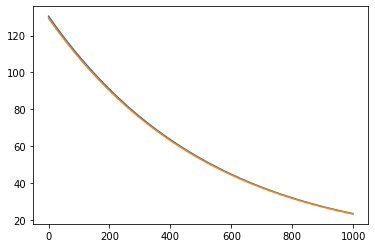

In [120]:
plt.plot(E1)
plt.plot(E2)

По сравнению с градиентным спуском стохастический градиентный спуск быстрее сходится в начале и медленнее - в конце.

2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [124]:
def calc_l2_mse(y, y_pred, W):
    err = np.mean((y - y_pred)**2)*np.linalg.norm(W)
    return err

In [131]:
def eval_model_l2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    E = []
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_l2_mse(y, y_pred, W)
        E.append(err**0.5)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)) + lambda_ * np.sum(W**2))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W, E

In [132]:
def eval_sgd_model_l2(X, y, iterations, qty_in_batch=1, alpha=1e-4, lambda_=1e-8):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    E = []
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

            # print(b, n_batch, start_, end_)

            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_l2_mse(y_tmp, y_pred_tmp, W)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)) + lambda_ * np.sum(W**2))
        y_pred = np.dot(W, X)
        E.append(calc_l2_mse(y, y_pred, W)**0.5)
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W, E

In [133]:
W1, E1 = eval_model_l2(X.T, y, iterations=1000, alpha=1e-3)
print()
W2, E2 = eval_sgd_model_l2(X.T, y, iterations=1000, qty_in_batch=5, alpha=1e-3)

100 [ 2.91243318  4.8195041  15.46554304  2.27889909 14.00863284] 263300.9988647256
200 [ 6.01420269  8.09172396 27.98120806  3.92830389 27.77105875] 346860.25143056904
300 [ 8.52843305 10.77431671 38.47305204  5.26551647 39.19892484] 337256.5977282655
400 [10.56660878 12.97354591 47.26642795  6.34914628 48.68891155] 291444.8752084134
500 [12.21908076 14.77657088 54.63480613  7.22691962 56.57022556] 237062.80462135113
600 [13.55905325 16.2548575  60.80795     7.93766732 63.11607386] 186299.28653058282
700 [14.64582679 17.46698907 65.97882728  8.51295924 68.55319211] 143567.23434805142
800 [15.5274329  18.46097973 70.30944629  8.97844531 73.06975481] 109593.10085085795
900 [16.24277289 19.27617629 73.93577983  9.35495367 76.82194034] 83533.04587754245
1000 [16.8233528  19.9448203  76.97191598  9.65938842 79.93937877] 64023.74492990154

100 [ 3.43609503  4.3328642  15.48999177  2.83734336 13.35584251] 213912.64182042787
200 [ 6.25854642  7.51886214 27.80881282  4.20175832 27.0263433 ] 27

L2 регуляризация приводит к уменьшению наиболее крупных весов.

In [134]:
def calc_l1_mse(y, y_pred, W):
    err = np.mean((y - y_pred)**2)*np.linalg.norm(W)
    return err

In [141]:
def eval_model_l1(X, y, iterations, alpha=1e-4, lambda_=1e-6):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    E = []
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_l1_mse(y, y_pred, W)
        E.append(err**0.5)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)) + lambda_ * np.sum(np.abs(W)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W, E

In [142]:
def eval_sgd_model_l1(X, y, iterations, qty_in_batch=1, alpha=1e-4, lambda_=1e-6):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    E = []
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

            # print(b, n_batch, start_, end_)

            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_l2_mse(y_tmp, y_pred_tmp, W)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)) + lambda_ * np.sum(np.abs(W)))
        y_pred = np.dot(W, X)
        E.append(calc_l2_mse(y, y_pred, W)**0.5)
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W, E

In [143]:
W1, E1 = eval_model_l1(X.T, y, iterations=1000, alpha=1e-3)
print()
W2, E2 = eval_sgd_model_l1(X.T, y, iterations=1000, qty_in_batch=5, alpha=1e-3)

100 [ 3.28581418  5.6668575  15.04483569  1.45577173 15.70331615] 270847.4638364384
200 [ 6.30136991  8.76008323 27.63426867  3.23600983 29.17488032] 347865.8939002686
300 [ 8.74613104 11.29864474 38.18436671  4.68082167 40.35970438] 335555.97687997285
400 [10.72876016 13.38237828 47.02407094  5.85341845 49.64704002] 288965.92117862025
500 [12.33713278 15.09308346 54.4295424   6.80509358 57.35967478] 234665.135341645
600 [13.6423301  16.49779355 60.63257577  7.57747126 63.76531931] 184300.91457212268
700 [14.70186222 17.65145077 65.82768294  8.20433049 69.08603656] 142030.79429652155
800 [15.56227067 18.59909522 70.1780543   8.71308454 73.50605059] 108473.84178047453
900 [16.26122999 19.37765604 73.82057393  9.12598132 77.17821495] 82751.47605432851
1000 [16.82924508 20.01741752 76.87003744  9.46107715 80.22937127] 63498.63100569587

100 [ 3.70628144  3.67649948 14.8489296   1.22781461 16.64159048] 214449.81669146236
200 [ 5.63659786  6.15048198 26.44188146  1.99976551 28.92920115] 262

L1 регуляризация приводит к уменьшению наименее значимых весов